# House Price Prediction using Linear Regression (Implemented From Scratch Without Scikit-Learn)


This notebook demonstrates how a Linear Regression model works internally.
Instead of using machine learning libraries like sklearn, the algorithm is
implemented manually using Python, NumPy, and Pandas.

The objective is to understand the mathematical working of linear regression,
including preprocessing, training using gradient descent, and performance evaluation.


## Problem Statement

Real estate price prediction is an important task in the housing industry. Buyers, sellers, and property investors need an estimate of house value before making decisions.

The goal of this project is to build a machine learning model that predicts the price of a house based on its features such as area, number of bedrooms, bathrooms, parking availability, and facilities.

To better understand how machine learning works internally, Linear Regression is implemented from scratch using Python, NumPy, and Pandas without using libraries like scikit-learn.


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Part 1: Dataset Loading and Understanding

We use a housing dataset containing different features of houses such as area, number of bedrooms, bathrooms, parking, and facilities.  
The target variable is the house price.

Before building a model, we must inspect the dataset to understand the type of data available.


In [36]:
data = pd.read_csv("Housing.csv")
data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


We now inspect column names and data types.  
This helps identify numerical and categorical features.


In [37]:
data.columns
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Feature Description

• price — target variable representing house price  
• area — size of the house (square feet)  
• bedrooms — number of bedrooms  
• bathrooms — number of bathrooms  
• stories — number of floors  
• mainroad — whether connected to main road  
• guestroom — guest room availability  
• basement — basement availability  
• hotwaterheating — hot water heating facility  
• airconditioning — air conditioning availability  
• parking — number of parking spaces  
• prefarea — located in preferred area  
• furnishingstatus — furnishing condition



##Part 2: Exploratory Data Analysis (EDA)

Before training a machine learning model, it is important to analyze the dataset visually.
EDA helps us understand patterns, feature distributions, and relationships with the target variable.

We analyze:
• Price distribution
• Relationship between area and price
• Correlation between features


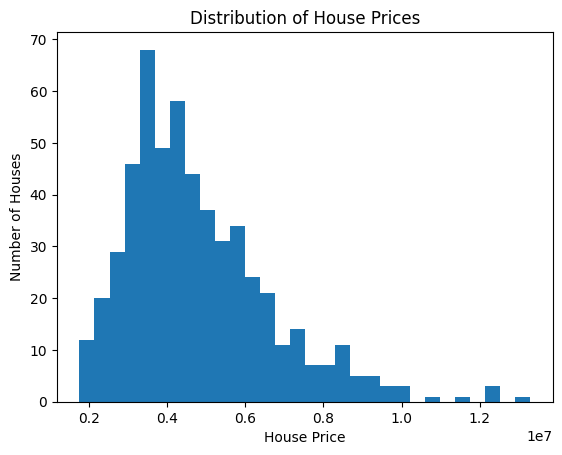

In [49]:
plt.hist(data['price'], bins=30)
plt.xlabel("House Price")
plt.ylabel("Number of Houses")
plt.title("Distribution of House Prices")
plt.show()


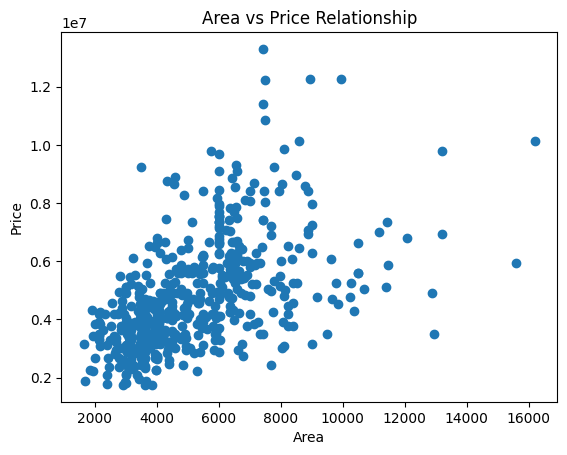

In [50]:
plt.scatter(data['area'], data['price'])
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area vs Price Relationship")
plt.show()


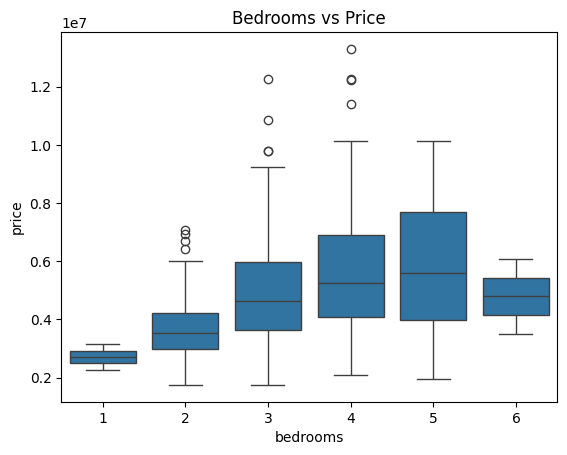

In [57]:
sns.boxplot(x=data['bedrooms'], y=data['price'])
plt.title("Bedrooms vs Price")
plt.show()


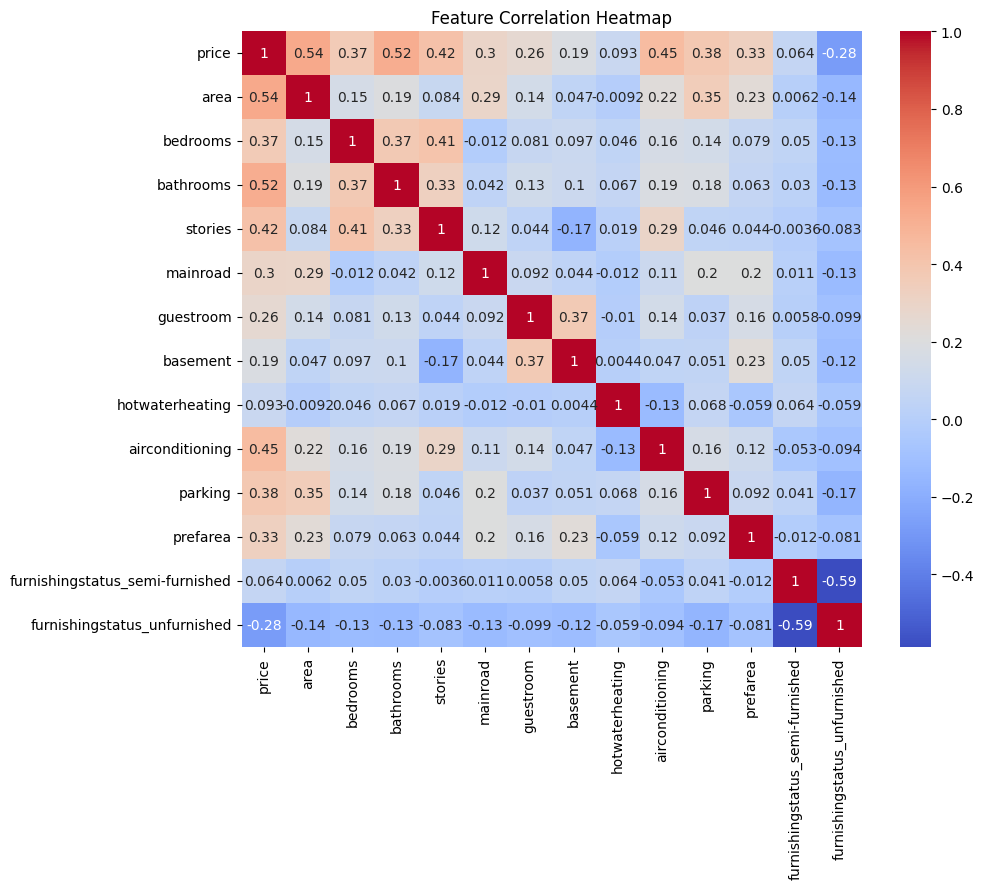

In [55]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


### Observations from EDA

From the visualizations, the distribution of house prices appears right-skewed, indicating that most houses fall in the medium price range while a few expensive houses act as outliers.

The scatter plot shows a clear positive relationship between area and price, meaning larger houses generally cost more.

The boxplot indicates that houses with more bedrooms tend to have higher median prices.

The correlation heatmap shows strong positive correlation between price and features such as area, bathrooms, and stories. Therefore, a linear model is suitable for this dataset.

Since multiple features show approximately linear relationships with price and the correlation heatmap indicates strong positive correlations, a Linear Regression model is an appropriate initial choice for predicting house prices in this dataset.


## Part 3: Data Preprocessing

Machine learning algorithms require numerical input.  
However, the dataset contains categorical values such as "yes" and "no".

Before applying preprocessing techniques, we separate the dataset into independent variables (features) and dependent variable (target).
The target variable is the house price, which the model must predict, while all other columns act as input features used to estimate the price.
This separation is necessary because machine learning models learn a mapping from input features (X) to output variable (y).


Therefore:
• Binary categorical values are converted to 1 and 0
• Multi-category variables are converted using One-Hot Encoding


In [38]:
binary_columns = [
    'mainroad',
    'guestroom',
    'basement',
    'hotwaterheating',
    'airconditioning',
    'prefarea'
]

for col in binary_columns:
    data[col] = data[col].map({'yes': 1, 'no': 0})


The feature "furnishingstatus" has three categories (furnished, semi-furnished, unfurnished).  
We convert it into multiple binary columns using One-Hot Encoding.


In [39]:
data = pd.get_dummies(data, columns=['furnishingstatus'], drop_first=True)
data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


### Dataset Information

The dataset contains 545 housing records with 13 features describing property characteristics such as size, facilities, and location preferences.

Each row represents one house and the target variable is the selling price. The dataset includes both numerical and categorical attributes, which require preprocessing before training the model.


## Part 4: Feature Scaling

Different features have different ranges.  
For example:
• Area values are in thousands
• Binary features are 0 or 1

Gradient Descent performs poorly when feature scales differ significantly.  
Therefore we normalize the features using Standardization:

X = (X − mean) / standard deviation


In [61]:
y = data['price']
X = data.drop('price', axis=1)



Why Feature Scaling is Required

Gradient Descent updates parameters using partial derivatives.
If one feature has a very large range (e.g., area in thousands) and another has a small range (0/1), the gradient values become unbalanced.
This causes very slow convergence or oscillations.

Standardization ensures all features contribute equally to weight updates and helps Gradient Descent converge faster and more stably.


Feature scaling is especially important for gradient descent because the algorithm depends on slope calculations, and unscaled data causes inefficient learning.

## Part 5: Train-Test Split

To evaluate the model fairly, the dataset is divided into:
• Training Set (80%) → used to learn weights
• Testing Set (20%) → used to evaluate performance on unseen data


In [41]:
X = np.array(X)
y = np.array(y)

np.random.seed(42)

n = len(X)
indices = np.random.permutation(n)

train_size = int(0.8 * n)

train_idx = indices[:train_size]
test_idx = indices[train_size:]

X_train = X[train_idx]
X_test = X[test_idx]
y_train = y[train_idx]
y_test = y[test_idx]


In [64]:
# Correct Feature Scaling (No Data Leakage)

mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

# prevent division by zero
std[std == 0] = 1

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std



### Why Train-Test Split is Necessary

If a model is evaluated on the same data it was trained on, it may memorize the dataset instead of learning real patterns. This is called overfitting.

By testing the model on unseen data (test set), we measure how well the model generalizes to new houses that it has never seen before. Therefore, the train-test split provides a fair evaluation of model performance.

The objective of machine learning is not only to perform well on training data but to generalize to unseen data. The test set simulates real-world scenarios where the model predicts prices for houses it has never encountered before.


## Part 6: Linear Regression Model

Linear Regression models the relationship between input features (X) and target variable (y) using a linear equation:

y = w1x1 + w2x2 + ... + wnxn + b

Where:
w = weights (coefficients)
b = bias (intercept)

The model predicts the house price by multiplying each feature with its corresponding weight and adding the bias.


In [42]:
def predict(X, weights, bias):
    return np.dot(X, weights) + bias


## Part 7: Loss Function (Mean Squared Error)

After prediction, we must measure how wrong the prediction is.

We use Mean Squared Error (MSE):

MSE = (1/n) Σ(y_actual − y_predicted)²

A lower MSE indicates a better model.


In [43]:
def compute_mse(y_true, y_pred):
    n = len(y_true)
    return np.sum((y_true - y_pred) ** 2) / n


Why Gradient Descent?

Linear Regression parameters can also be computed using a direct mathematical solution called the Normal Equation.
However, for large datasets or many features, matrix inversion becomes computationally expensive.

Gradient Descent is an iterative optimization algorithm that efficiently learns parameters even for large-scale machine learning problems.
Therefore, Gradient Descent is widely used in real-world ML systems.



## Part 8: Training using Gradient Descent

The model initially does not know the correct weights.  
We start with weights = 0.

Gradient Descent is an optimization algorithm that repeatedly updates weights to reduce error.

Steps:
1. Predict output
2. Compute error
3. Update weights
4. Repeat many times (epochs)

The algorithm moves step-by-step toward the minimum error.


In [44]:
def train_model(X, y, learning_rate=0.01, epochs=1000):

    n_samples, n_features = X.shape

    weights = np.zeros(n_features)
    bias = 0

    losses = []

    for i in range(epochs):

        y_pred = predict(X, weights, bias)

        loss = compute_mse(y, y_pred)
        losses.append(loss)

        dw = (2/n_samples) * np.dot(X.T, (y_pred - y))
        db = (2/n_samples) * np.sum(y_pred - y)

        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias, losses


In [45]:
weights, bias, losses = train_model(X_train, y_train)


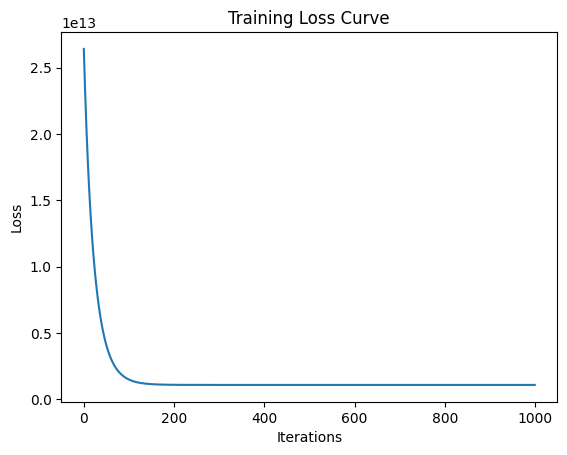

In [46]:
plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()


The loss curve decreases steadily as iterations increase, which indicates that the gradient descent algorithm is successfully minimizing the cost function.
The curve eventually flattens, showing that the model parameters have converged to near-optimal values.

The learning rate controls how large a step the model takes while updating weights.
A very small learning rate leads to slow convergence, while a very large learning rate may cause the algorithm to overshoot the minimum and diverge.
In this project, a learning rate of 0.01 provides stable convergence as seen in the loss curve.


## Part 9: Model Evaluation

We now test the model on unseen data to measure performance.


In [47]:
y_pred = predict(X_test, weights, bias)
mse = compute_mse(y_test, y_pred)
print("Test MSE:", mse)


Test MSE: 1241710279042.6006


In [56]:
rmse = np.sqrt(mse)
print("RMSE:", rmse)


RMSE: 1114320.545912441


### Interpretation of RMSE

Root Mean Squared Error (RMSE) represents the average prediction error in the same unit as the target variable (price).

An RMSE of approximately 1.1 million means that, on average, the predicted house price differs from the actual price by about this amount.


In [59]:
ss_total = np.sum((y_test - np.mean(y_test))**2)
ss_residual = np.sum((y_test - y_pred)**2)
r2 = 1 - (ss_residual / ss_total)

print("R2 Score:", r2)


R2 Score: 0.6464382654255743


### Interpretation of R² Score

The R² score represents how well the model explains the variation in house prices.
An R² value of 0.64 means that approximately 64% of the variation in house prices is explained by the input features used in the model.

The remaining variation may be due to factors not present in the dataset such as location quality, nearby infrastructure, and property age.


### Which Metric is Most Important?

Among the evaluation metrics, RMSE is the most interpretable because it is measured in the same unit as house price. It directly tells how far predictions are from actual values on average.

While R² shows how much variance is explained by the model, RMSE is more useful in real estate applications because buyers and sellers care about the actual price difference rather than percentage explanation.


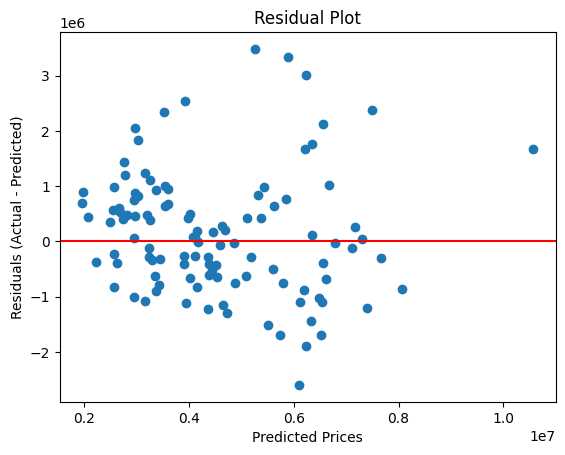

In [65]:
# Residual Analysis
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()


## Part 10: Example Prediction

We predict the price of a house from the test dataset and compare it with the actual price.


In [48]:
sample_index = 0

predicted_price = predict(X_test[sample_index], weights, bias)
actual_price = y_test[sample_index]

print("Predicted Price:", predicted_price)
print("Actual Price:", actual_price)


Predicted Price: 7488405.21243681
Actual Price: 9870000


## Conclusion

In this project, Linear Regression was implemented from scratch without using machine learning libraries.

We performed:
• Data preprocessing
• Feature encoding
• Feature scaling
• Gradient Descent training
• Model evaluation

From the evaluation, the RMSE value indicates that the predicted house prices differ from actual prices by approximately this amount on average.
This error is reasonable considering the dataset size and limited number of features.
With more features such as location coordinates or house age, the model performance could be further improved.

Overall, the model provides reasonably accurate predictions but is not perfectly precise. The error values and R² score indicate that Linear Regression can capture general pricing trends, but additional features and more advanced models could further improve performance.

This type of predictive model can assist real estate agencies, property websites, and buyers in estimating property values and making informed financial decisions.

This project demonstrates how machine learning models actually learn patterns from data and make predictions.


Limitations and Future Improvements

• The model assumes a linear relationship between features and price, which may not fully capture real housing market behavior.
• Important features such as location coordinates, neighborhood quality, and house age are not present in the dataset.
• Outliers in house prices may affect model accuracy.

Future improvements could include using polynomial regression, regularization techniques (Ridge/Lasso), or more advanced models such as Decision Trees and Random Forests.
